### Data analysis project by David Zireva
#### Bank customer churn analysis

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
# import csv file
df = pd.read_csv('Bank_Churn.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.shape

(10000, 13)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [136]:
# Filtering customers who churned from the dataset 

df1 = df[df['Exited'] == 1]
df1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [138]:
df1 = df1.reset_index(drop = True)
df1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
2,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
3,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
4,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [140]:
# drop columns that are not useful for the analysis
removecols = ['CustomerId', 'Surname', 'Exited']
df1 = df1.drop(columns = removecols, axis = 1)
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,502,France,Female,42,8,159660.80,3,1,0,113931.57
2,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
3,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
4,653,Germany,Male,58,1,132602.88,1,1,0,5097.67


In [142]:
# some discriptive statistics
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000
mean,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531
std,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000
50%,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000
75%,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000
max,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000


In [148]:
# renaming some columns
df1 = df1.rename(columns = {'CreditScore':'creditscore','NumOfProducts':'products','Gender':'gender','Age':'age', 'Tenure':'tenure','Balance':'balance','HasCrCard': 'card', 'IsActiveMember':'member','EstimatedSalary':'salary', 'Geography':'country'})
df1.head()

,creditscore,country,gender,age,tenure,balance,products,card,member,salary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,502,France,Female,42,8,159660.80,3,1,0,113931.57
2,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
3,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
4,653,Germany,Male,58,1,132602.88,1,1,0,5097.67


In [152]:
# rearranging columns starting with non numeric ones
df1 = df1[['country','gender','age','tenure','products', 'card', 'member', 'creditscore', 'balance','salary']]
df1.head(3)

,country,gender,age,tenure,products,card,member,creditscore,balance,salary
0,France,Female,42,2,1,1,1,619,0.00,101348.88
1,France,Female,42,8,3,1,0,502,159660.80,113931.57
2,Spain,Male,44,8,2,1,0,645,113755.78,149756.71


## Exploratory Data Analysis

#### **The distribution of country column**

Text(0.5, 1.0, 'fig 1')

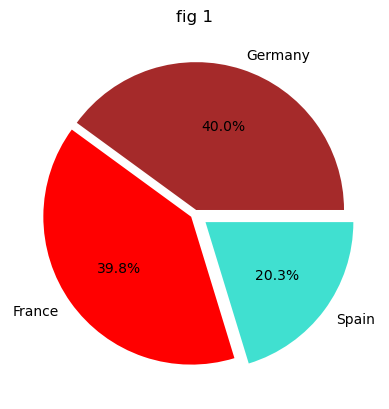

In [227]:
# plotting the pie chart for country and the proportion of customers who churned.
df1['country'].value_counts().plot(kind= 'pie', ylabel= '',colors= ['brown','red','turquoise'],autopct='%1.1f%%',explode= [0.03,0.03,0.09] )
plt.title('fig 1')


#### **The distribution of gender column**

Text(0.5, 1.0, 'Churn by Gender')

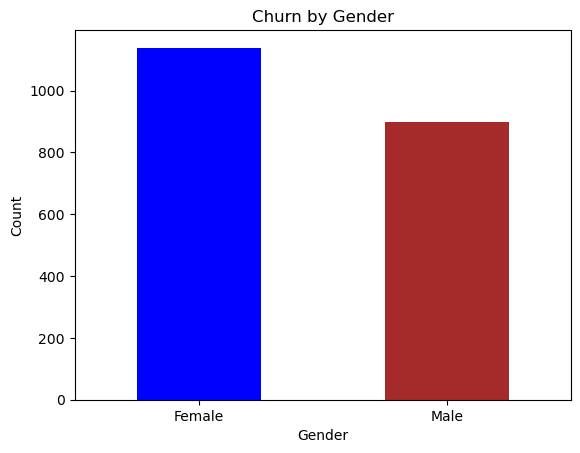

In [156]:
# plotting the bar chart for gender and the proportion of customers who churned.
df1['gender'].value_counts().plot(kind= 'bar',xlabel= '', color = ['blue','brown'])
plt.xticks(rotation= 'horizontal')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title(label = 'Churn by Gender')


#### **Salary distribution**

In [189]:
df1['salary']

0       101348.88
1       113931.57
2       149756.71
3       119346.88
4         5097.67
          ...    
2032     53445.17
2033    115146.40
2034     69384.71
2035     42085.58
2036     92888.52
Name: salary, Length: 2037, dtype: float64

Text(0.5, 1.0, 'fig 3')

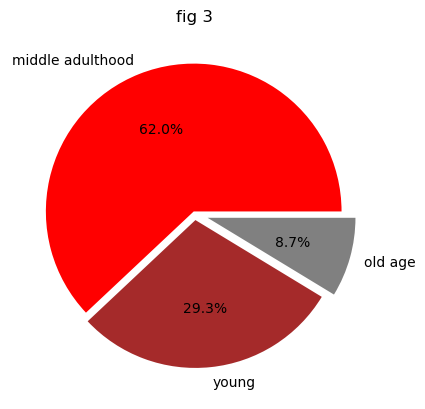

In [225]:
# converting the age values into categories 
def rank_age(years):
    if years <=39:
        return 'young'
    elif years>39 and years<59:
        return 'middle adulthood'
    else:
        return 'old age'
df1['age'].apply(func = rank_age).value_counts().plot(kind = 'pie',autopct='%1.1f%%',explode= [0.02,0.04,0.09],colors= ['red','brown','grey'])
plt.ylabel('')
plt.title('fig 3')
        

#### **The distribution of salary column**

In [158]:
df1['salary'].describe()

count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
25%       51907.720000
50%      102460.840000
75%      152422.910000
max      199808.100000
Name: salary, dtype: float64

<Figure size 1000x400 with 0 Axes>

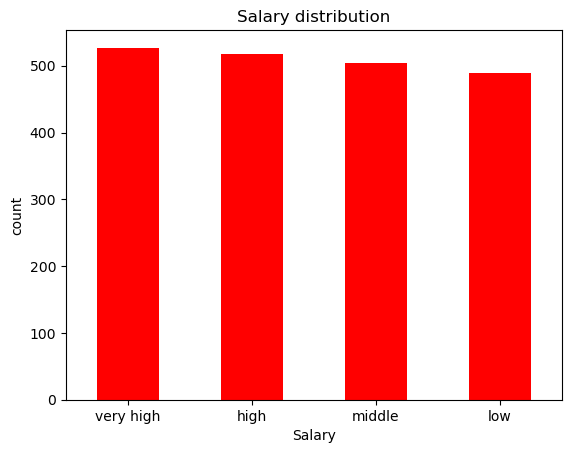

<Figure size 1000x400 with 0 Axes>

In [219]:
# Converting values in the salary column into categories.
def rank_sal(pay):
    if pay <= 50000: 
        return 'low'
    elif pay >50000 and pay<= 100000:
        return 'middle'
    elif pay>100000 and pay<=150000:
        return 'high'
    else:
        return 'very high'
df1['salary'].apply(rank_sal).value_counts().plot(kind= 'bar',color= 'red')
plt.xticks(rotation= 'horizontal')
plt.title('Salary distribution')
plt.ylabel('count')
plt.xlabel('Salary')  
plt.figure(figsize=(10, 4))

#### **The distribution of balance column**

In [160]:
df1['balance'].describe()

count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: balance, dtype: float64

Text(0.5, 0, 'Balance')

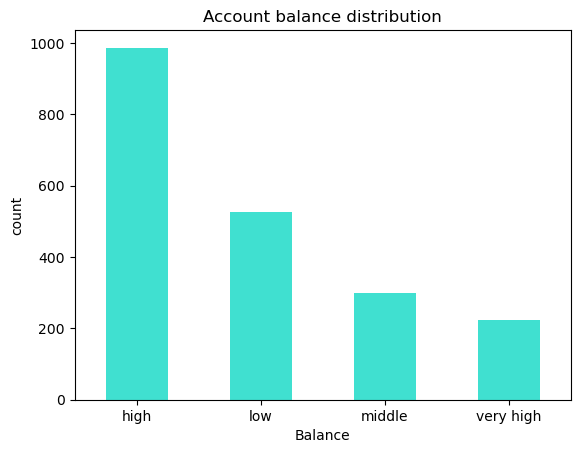

In [221]:
# Converting the values in the Balance column into categories.
def rank_bal(balance):
    if balance <= 40000: 
        return 'low'
    elif balance >40000 and balance<= 110000:
        return 'middle'
    elif balance>110000 and balance<=140000:
        return 'high'
    else:
        return 'very high'
df1['balance'].apply(rank_sal).value_counts().plot(kind= 'bar',color ='turquoise')
plt.xticks(rotation= 'horizontal')
plt.title('Account balance distribution')
plt.ylabel('count')
plt.xlabel('Balance')

#### **The distribution of creditscore column**

In [223]:
df1['creditscore'].describe()

count    2037.000000
mean      645.351497
std       100.321503
min       350.000000
25%       578.000000
50%       646.000000
75%       716.000000
max       850.000000
Name: creditscore, dtype: float64

<Figure size 1600x2500 with 0 Axes>

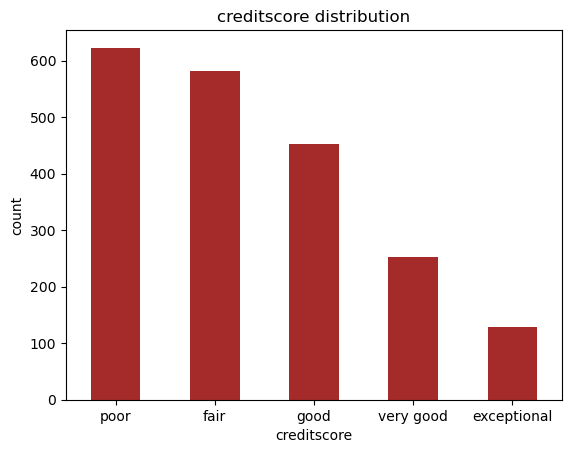

<Figure size 1600x2500 with 0 Axes>

In [92]:
# Converting the values in the creditscore column into categories.
def rank_credit(score):
    if score <= 595: 
        return 'poor'
    elif score >579 and score<=669 :
        return 'fair'
    elif score>669 and score<=739:
        return 'good'
    elif score>739 and score<=799:
        return'very good'
    else:
        return 'exceptional'
df1['creditscore'].apply(rank_credit).value_counts().plot(kind= 'bar',color ='brown')
plt.xticks(rotation= 'horizontal')
plt.title('creditscore distribution')
plt.ylabel('count')
plt.xlabel('creditscore')
plt.figure(figsize=(16, 25))


#### **The distribution of tenure column**

In [168]:
df2 = df1.sort_values('tenure')
df2

,country,gender,age,tenure,products,card,member,creditscore,balance,salary
481,Spain,Female,45,0,1,1,0,689,57784.22,197804.00
1103,Germany,Male,31,0,1,1,0,510,113688.63,33099.41
296,Spain,Female,33,0,1,1,0,636,0.00,92277.47
1094,Germany,Female,40,0,1,1,1,655,81954.60,198798.44
1625,France,Male,45,0,1,1,0,623,0.00,196533.72
...,...,...,...,...,...,...,...,...,...,...
77,Germany,Male,45,10,3,1,1,745,117231.63,122381.02
1095,Germany,Female,37,10,1,1,0,780,95196.26,126310.39
48,France,Male,33,10,1,1,0,850,0.00,4861.72
1249,France,Female,37,10,3,0,1,629,99546.25,25136.95


In [170]:
df2['tenure'].describe()

count    2037.000000
mean        4.932744
std         2.936106
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: tenure, dtype: float64

Text(0, 0.5, 'Count')

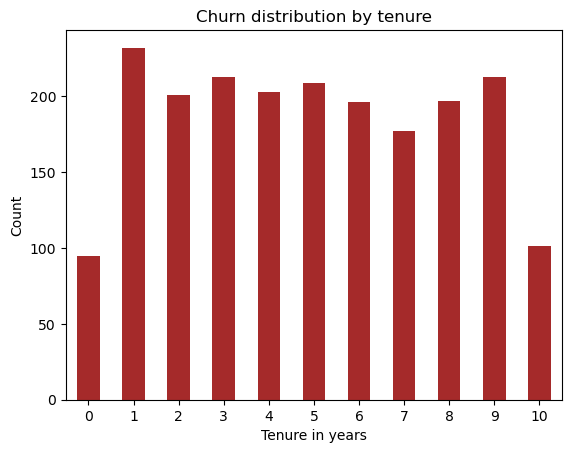

In [172]:
df2['tenure'].value_counts(sort =False).plot(kind= 'bar',color= 'brown')
plt.xticks(rotation= 'horizontal')
plt.title('Churn distribution by tenure')
plt.xlabel('Tenure in years')
plt.ylabel('Count')

#### **Distribution of number of products column**

In [174]:
df1['products'].describe()

count    2037.000000
mean        1.475209
std         0.801521
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: products, dtype: float64

Text(0, 0.5, 'Count')

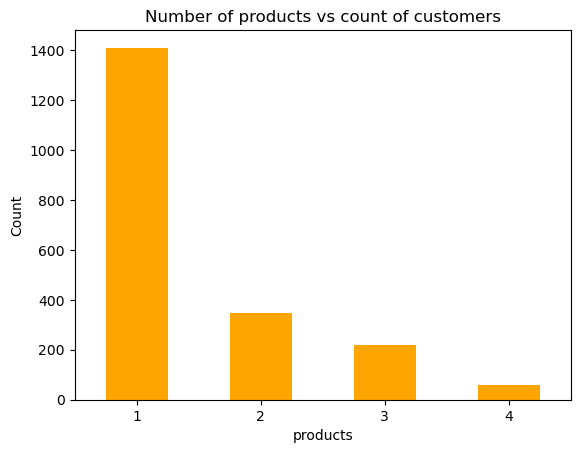

In [176]:
df1['products'].value_counts().plot(kind = 'bar', color= 'orange')
plt.xticks(rotation= 'horizontal')
plt.title('Number of products vs count of customers')
plt.ylabel('Count')

#### **The distribution of card column**

(array([0, 1]), [Text(0, 0, 'yes'), Text(1, 0, 'no')])

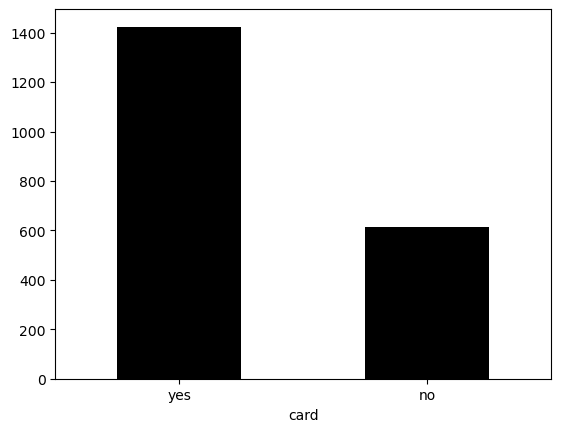

In [178]:
# replacing 0s and 1s with no and yes respectively
df3 = df1['card'].replace({1:'yes',0:'no'})
df3.value_counts().plot(kind= 'bar',color= 'black')
plt.xticks(rotation= 'horizontal')

#### **Distribution of member column**

In [180]:
# replace values in the member 
df4 = df1['member'].replace({1:'yes',0:'No'})

Text(0.5, 1.0, 'Is member distribution')

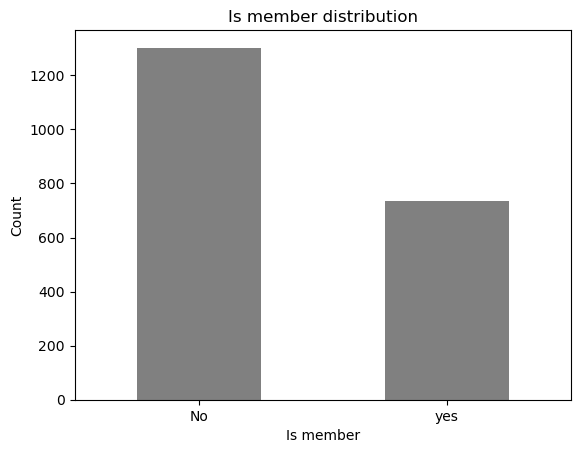

In [182]:
df4.value_counts().plot(kind= 'bar',color= 'grey')
plt.xlabel('Is member')
plt.xticks(rotation= 'horizontal')
plt.ylabel('Count')
plt.title('Is member distribution')

###                                                          Conclusion:

* From the first graph, Germany has the highest churn rate (40%), followed by France (39.8) and Spain (20.3). This insight can assist the bank in targeting specific regions for retention efforts or exploring reasons behind the higher churn rate in Germany. This may suggest that the bank has a heavy competition in this country.

* For the churn distribution based on gender, female customers are likely to churn than male customers. Further analysis is required to ascertain whether this difference is significant.

* From the churn distribution by age graph in fig 3, the highest churn rate is found in 40 - 59 age bracket. Customers who are 60 years and older seem to be loyal to the bank and are less
likely to churn the bank.

* Salary do not impact the customer attrition rate. From figure 3 we can see that there is nothing interesting in the churn distribution by salary column as there is
no significant churn rate difference among all age groups.

* From the churn distribution by tenure graph, customers who have 1 year with the bank are the most likely to leave for other competitors, while those are with the bank for 10 years tend
to stay.

* Customers with only 1 bank product churned the most while those with 4 are likely to continue with the bank. The number of products a customer uses negetively correlates with the churn
rate.

* From the churn distribution by card, customers with a poor credit history (that is, a credit score below 595) will undoubtedly leave the bank, which is visible in the bar graph on fig 5.

* From the churn distribution by member graph, it is apparent that customers who are no active members are leaving the bank thwe most while those who are active members are likely to stick
to the bank.

* Customers with account balance lies in the range 110000 and 140000 are likeley to churn the bank. Premium accounts and higher savings interest at other banks could be the root cause of this. 


    
